In [1]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
  y = w ** 2
  z = 2*y + 5
  return z

In [2]:
with tf.GradientTape() as tape:
  z = f(w)
  
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [3]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w*x + b

In [4]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [5]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [6]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    
    cost = mse_loss(y_pred, y)
    
  gradients = tape.gradient(cost, [w, b])
  
  optimizer.apply_gradients(zip(gradients, [w, b]))
  
  if i % 10 == 0:
    print(f"epoch : {i} | w : {w.numpy():.4f} | b : {b.numpy():.4f} | cost : {cost:.4f}")

epoch : 0 | w : 8.2133 | b : 1.6644 | cost : 1402.5555
epoch : 10 | w : 10.4971 | b : 1.9769 | cost : 1.3512
epoch : 20 | w : 10.5047 | b : 1.9297 | cost : 1.3282
epoch : 30 | w : 10.5119 | b : 1.8844 | cost : 1.3070
epoch : 40 | w : 10.5188 | b : 1.8409 | cost : 1.2874
epoch : 50 | w : 10.5254 | b : 1.7991 | cost : 1.2695
epoch : 60 | w : 10.5318 | b : 1.7591 | cost : 1.2529
epoch : 70 | w : 10.5379 | b : 1.7206 | cost : 1.2376
epoch : 80 | w : 10.5438 | b : 1.6837 | cost : 1.2236
epoch : 90 | w : 10.5494 | b : 1.6483 | cost : 1.2107
epoch : 100 | w : 10.5548 | b : 1.6143 | cost : 1.1987
epoch : 110 | w : 10.5600 | b : 1.5817 | cost : 1.1878
epoch : 120 | w : 10.5650 | b : 1.5504 | cost : 1.1777
epoch : 130 | w : 10.5697 | b : 1.5204 | cost : 1.1684
epoch : 140 | w : 10.5743 | b : 1.4916 | cost : 1.1598
epoch : 150 | w : 10.5787 | b : 1.4639 | cost : 1.1519
epoch : 160 | w : 10.5829 | b : 1.4373 | cost : 1.1446
epoch : 170 | w : 10.5870 | b : 1.4119 | cost : 1.1379
epoch : 180 | w : 1

In [7]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [1]:
import tensorflow as tf

tf.__version__

'2.10.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(x, y, epochs=10)

Epoch 1/10


c:\Users\Hi\miniconda3\envs\NLP\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 350ms/step - loss: 2848.8923 - mse: 2848.8923
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 351.5450 - mse: 351.5450
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 44.2645 - mse: 44.2645
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4554 - mse: 6.4554
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8026 - mse: 1.8026
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.2294 - mse: 1.2294
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.1583 - mse: 1.1583
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.1489 - mse: 1.1489
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 1.1471 - mse: 1.1471
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.1462 - mse: 1.1462


In [5]:
prediction = model.predict(x)

1/1 [==============================] - 0s 85ms/step


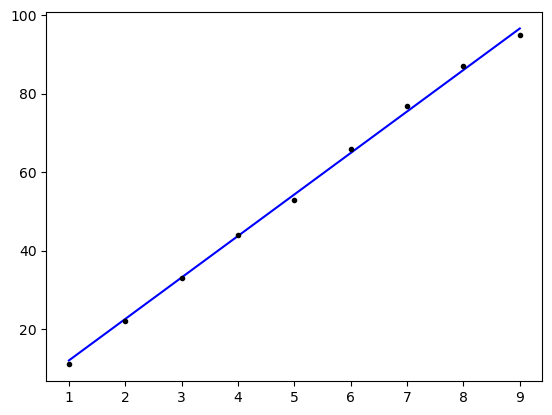

In [16]:
plt.plot(x, prediction.tolist(), 'b', x, y, 'k.')
plt.show()

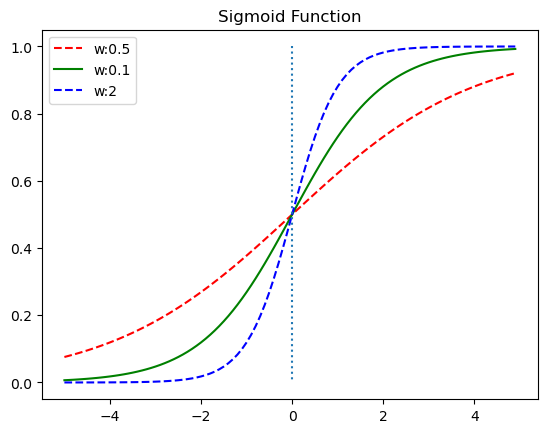

In [20]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)
plt.plot(x, y1, 'r', linestyle='--', label='w:0.5') # w의 값 이 0.5일 때
plt.plot(x, y2, 'g', label='w:0.1') # w의 값 이 1일 때
plt.plot(x, y3, 'b', linestyle='--', label='w:2') # w의 값 이 2일 때
plt.plot([0,0],[1.0,0.0], ':') # 가 운 데 점 선 추 가
plt.title('Sigmoid Function')

plt.legend()
plt.show()

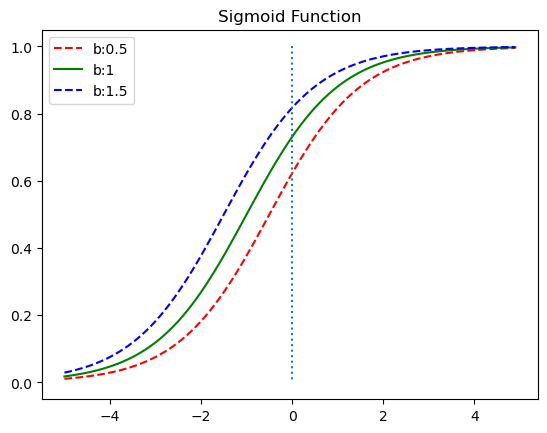

In [23]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)
plt.plot(x, y1, 'r', linestyle='--', label='b:0.5') # x + 0.5
plt.plot(x, y2, 'g', label='b:1') # x + 1
plt.plot(x, y3, 'b', linestyle='--', label='b:1.5') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가 운 데 점 선 추 가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫 자 10부 터 

model = Sequential()

model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x, y, epochs=200)

Epoch 1/200


c:\Users\Hi\miniconda3\envs\NLP\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 391ms/step - loss: 5.9557 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.9323 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2179 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2153 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2131 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2113 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2098 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2086 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2074 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 0.

1/1 [==============================] - 0s 54ms/step


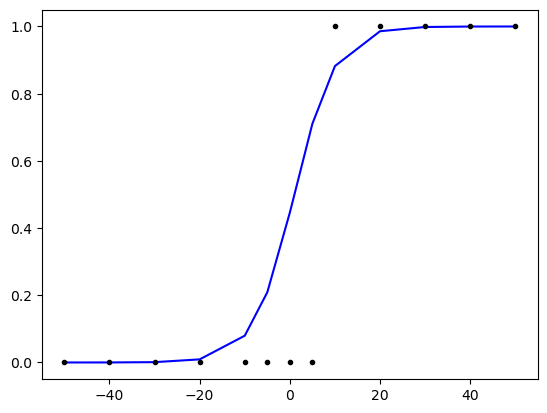

In [25]:
plt.plot(x, model.predict(x).tolist(), 'b', x,y, 'k.')


In [26]:
# 중 간 고 사 , 기 말 고 사 , 가 산 점 점 수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]])
y = np.array([73, 82 ,72, 57, 34]) # 최 종 성 적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000


c:\Users\Hi\miniconda3\envs\NLP\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 450ms/step - loss: 83.2393 - mse: 83.2393
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 72.4494 - mse: 72.4494
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 66.1379 - mse: 66.1379
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 62.3360 - mse: 62.3360
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 59.9566 - mse: 59.9566
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 58.3935 - mse: 58.3935
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 57.3057 - mse: 57.3057
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 56.4985 - mse: 56.4985
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 55.8596 - mse: 55.8596
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 55.3236 - mse: 55.3236
Epoch 11/2000
1/1 [==============================] - 0s 3ms/

벡터와 행렬 연산
- 